In [75]:
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [76]:
#loading my train dataset into python
train = pd.read_csv('Prodigy_ML01_assessts/train.csv')
test = pd.read_csv('Prodigy_ML01_assessts/test.csv')

In [77]:
train['bathroom']=train['FullBath'] + train['HalfBath']
test['bathroom']=test['FullBath'] + test['HalfBath']


In [78]:
#factors that will predict the price
desired_factors = ['LotArea', 'BedroomAbvGr', 'bathroom']

In [79]:
lm = LinearRegression()

In [80]:
#set prediction data to factors that will predict, and set target to SalePrice
train_data = train[desired_factors]
test_data = test[desired_factors]
target = train.SalePrice

In [81]:
train_data

,LotArea,BedroomAbvGr,bathroom
0,8450,3,3
1,9600,3,2
2,11250,3,3
3,9550,3,1
4,14260,4,3
...,...,...,...
1455,7917,3,3
1456,13175,3,2
1457,9042,4,2
1458,9717,2,1


array([[<Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'BedroomAbvGr'}>],
       [<Axes: title={'center': 'bathroom'}>, <Axes: >]], dtype=object)

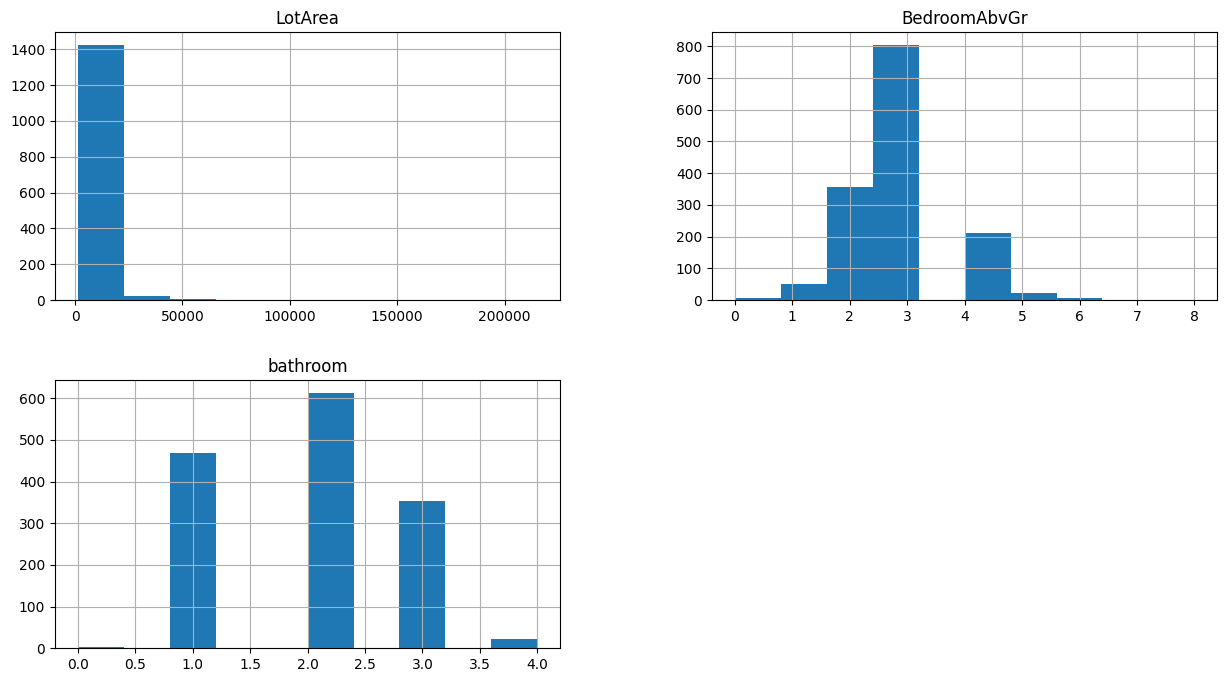

In [82]:
train_data.hist(figsize=(15,8))

In [83]:
#fitting model with prediction data and telling it my target
lm.fit(train_data, target)

LinearRegression()

In [84]:
pred = lm.predict(test_data)

In [85]:
pred_df = pd.DataFrame(data=pred[:])
pred_df.columns = ["SalePrice"]
pred_df

,SalePrice
0,135125.903519
1,189321.167958
2,246716.581546
3,240024.357499
4,181784.571362
...,...
1454,167898.059253
1455,167825.091078
1456,132572.070443
1457,124519.484610


In [86]:
df = pd.read_csv("Prodigy_ML01_assessts/test.csv", usecols=[0])

In [87]:
frames = [df, pred_df]

In [88]:
result = pd.concat(frames,axis=1)
result.head(20)

,Id,SalePrice
0,1461,135125.903519
1,1462,189321.167958
2,1463,246716.581546
3,1464,240024.357499
4,1465,181784.571362
5,1466,240062.578924
6,1467,178398.527099
7,1468,237286.313600
8,1469,190768.343571
9,1470,129528.202096


In [89]:
# Save the DataFrame to a CSV file
result.to_csv('Prodigy_ML01_assessts/predictions.csv', index=False)